# **Title: An Analysis on NEOs using Data Science (A Threat From Above)**

## **Table of Contents**
1. [Supervised Learning Problem Description](#supervised-learning-problem-description)
2. [EDA Procedure (Exploratory Data Analysis)](#eda-procedure-exploratory-data-analysis)
3. [Analysis (model building and training)](#analysis-model-building-and-training)
4. [Results](#results)
5. [Discussion/Conclusion](#discussionconclusion)

### **Supervised Learning - Problem Description**

Deep Impact and Armageddon; all thriller movies. The theme of the these movies were astroid collisions. Astroid collisions and close encounters with Near Earth Objects are not just subjects of movie thrillers; but they are genuine concerns that demand scientific attention. Near Earth Objects aka NEOs, primarily comprise of asteroids and comets. These objects have the potential to impact our Earth; causing significant damage.  Devising early mitigation strategies are paramount in identified  potential threats. This is important, if we as species desire to move forward.  We have clear evidences that we already had previous NEO impacts from our past. Furthermore, as the skies are continually monitored and newer celestial objects are identified, the challenge is not just the detection but the efficient classification of these objects based on their threat level.   Existing methods often require manual domain expertise labeling, time-consuming assessments and may not be adaptive to the rapidly growing dataset	.  The large volume of data that we are generating of hazardous candidates require automated systems that can highlight potential threats. My project aims to fill the gap.  The goal project aims to contribute to the field.  

__Problem:__

Build a reliable model to classify newly found NEO objects.

We will be aquiring the dataset from NASA's NEO API and will be storing the data locally via CSV files. The platform tool that I will be using is Jupyter Notebooks and Python3 Programming Language. Where then we will explore its relationships using exploritory data analysis (EDA) of its columnar features via a Jypter notebook. From that data, we also build a retrainable model as new data is inserted into the full dataset using a python3 framework called skikitLearn. Then, we will be using a technique called Support Vector Machines to develop the model and its hyper tuning parameters. Lastly, we will do a comparison of their accuracies via a confusion matrix.

### **Data Importation**

The dataset is procured from NASA's API repository. The database offers a comprehensive collection of Near Earth Objects (NEOs)
uncovered during various sky survey sweeps.  The dataset has become a critical resource for numerous research initiatives aimed at
understanding and classifying NEOs. It is Maintained by Jason Duley and Dan Hammer. To use NASA's APIs,You first need to register and aquire an API_KEY. The specific API endpoint for this data is “api.nasa.gov".Since the are API Limitations 1000 calls per day.

I worte a python script, which calls the NASA's API and
pulls the data incrementlly in a pragmattic manner. The data is stored locally in a CSV file.

Referenced sample code here:

```
# Need timeseries data.. So I need more than seven days.
import datetime
import requests

def date_str(dt):
    return f"{dt.year}-{dt.month:02}-{dt.day:02}"

x0 = datetime.datetime(2021, 1, 1)
x1 = datetime.datetime(2021, 1, 2)
x2 = datetime.datetime(2021, 1, 8)
weeks=x2-x0
days=x1-x0

feed = []
for k in range(4*12):
    START_DATE=date_str(x0+k*weeks)
    END_DATE=date_str(x0+(k+1)*weeks-days)
    print(START_DATE,"-",END_DATE)
    URI=f"https://api.nasa.gov/neo/rest/v1/feed?start_date={START_DATE}&end_date={END_DATE}&api_key={API_KEY}"
    data = requests.get(URI).json()
    #data = resp.json()
    # Extract Data from JSON convert to CSV
    for j in data['near_earth_objects']:
        for i in data['near_earth_objects'][j]:  
            feed.append(f"{j},{i['id']},{i['name']},{i['absolute_magnitude_h']},{i['estimated_diameter']['kilometers']['estimated_diameter_min']},{i['estimated_diameter']['kilometers']['estimated_diameter_max']},{i['is_potentially_hazardous_asteroid']},{i['close_approach_data'][0]['orbiting_body']},{i['close_approach_data'][0]['relative_velocity']['kilometers_per_hour']},{i['close_approach_data'][0]['miss_distance']['kilometers']},{i['close_approach_data'][0]['miss_distance']['astronomical']}\n")

filename = f"data_feed.csv"
file = open(filename, "a")
file.write(f"date,id,name,absolute_magnitude_h,estimated_diameter_min(km),estimated_diameter_max(km),is_potentially_hazardous_asteroid,orbiting_body,kilometers_per_hour,miss_distance(km),miss_distance(AU)\n")
file.close()

```

### **EDA Procedure (Exploratory Data Analysis)**
The main purpose of EDA is to help look at data before making any assumptions. It can help identify obvious errors, as well as better understand patterns within the data, detect outliers or anomalous events, find interesting relations among the variables.

Data Pre-Processing and Cleaning. Data required little cleaning and some conversion from string to numerical data types.


1) We will investigate the correlation between the parameters.


2) Relations</br>

- Plotting the histogram for velocities </br>
- Plotting the histogram for sizes</br>
- Plotting the histogram for absolute_magnitude_h</br>


3) A correlation heatmap using libraries such as Matplotlib and Seaborn. It also contains a small view of the resulting heatmap which shows the correlation between various features such as absolute magnitude, estimated diameter, velocity, and other properties of the NEOs. The heatmap uses a diverging color palette and annotations to show the correlation values, which range from -1 to 1. For example, there is a strong negative correlation (around -0.71) between absolute magnitude and estimated diameter, which is intuitive since larger diameters would result in a lower magnitude (brighter object). Other values indicate varying degrees of positive and negative correlations between different features.

From the corelation heatmap, we can infer that the dataset includes a range of properties for NEOs, and the histograms help visualize the distribution of these properties, which is crucial for understanding the characteristics of NEOs. The heatmap, on the other hand, provides insights into how these properties relate to each other, which is essential for building predictive models. The negative correlation between absolute magnitude and estimated diameter suggests that as NEOs get larger, they tend to be brighter, which could be a critical factor in determining the potential hazard they may pose to Earth. The analysis of such data is key for developing automated systems that can efficiently classify NEOs based on their threat level, aiming to improve early mitigation strategies.

---
### **Analysis (model building and training)**

Model building as our problem at hand is binary classification we will be sampling the data in equally number, so that results won't be heavily skewed when modeling.

The choices between  Support Vector Methods  and  hyper parameters were made based on their widespread use and capability to provide binary classifications.

In my analysis, the Support Vector Machine (SVM) showed as a promising tool. SVM's capability to maximize the margin between different features played an important role, particularly in a dataset where the boundary between hazardous and non-hazardous objects.

### **Results**

- The Support Vector Machines model achieved an accuracy of 90% on the test dataset, indicating its robustness in classifying NEOs.

- The confusion matrix revealed that the model had a false positive rate of 12% and a false negative rate of 2%, emphasizing areas where the model might need further refinement.

- Accuracy comparisons with SVM Model kernels show respectively. RFB = 90%, Linear = 89%, Sigmoid = 82%, Poly = 89%.



### **Discussion/Conclusion**

In summary,

My project attempts to highlight the importance of predicting new potential collision candidates among the Near Earth Objects via a binary classifier.

Additionally, I did Exporatory Data Analysis on my dataset.  Also, in my analysis (during model building and training), Support Vector Machine (SVM) showed as a promising tool.
SVM's capability to maximize the margin between different features played an important role, particularly in a dataset where the boundary between hazardous and non-hazardous objects. Lastly, I then shared and review my results from my analysis.

In conclusion, There is importance for predicting Near Earth Impacts. This predictor can stand as an alert system.  This could help researchers' by savung them time; allowing them to focus on mitigation strategies. Additionally, while movies might dramatize the impact of these celestial objects, the underlying threat they represent is very real.The work done with this project provides a step forward in ensuring that when it comes to NEOs,  Science remains one step ahead of fiction.  With continual advancements in technology and an ever-growing dataset,
it's crucial that our tools evolve in tandem.

# **EDA Procedure (Exploratory Data Analysis):**

The main purpose of EDA is to help look at data before making any assumptions. It can help identify obvious errors, as well as better understand patterns within the data, detect outliers or anomalous events, find interesting relations among the variables.

In [ ]:
# Checks to see what GPU your using.
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Sat Jan 27 07:53:14 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

**Mount Google Drive**


absolute magnitude (M) is a measure of the luminosity of a celestial object

References:
https://www.kaggle.com/code/nagendrads/neo-classification/notebook


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np

mydriveUri="/content/drive/MyDrive/cu-boulder/CSCA-5522-DataMiningProject"
ROOT_DIR = mydriveUri
DATA_DIR = "%s" % ROOT_DIR
EVAL_DIR = "%s/evaluation" % ROOT_DIR
MODEL_DIR = "%s/models" % ROOT_DIR
print(ROOT_DIR,"\n",DATA_DIR,"\n",EVAL_DIR,"\n",MODEL_DIR)
df = pd.read_csv('%s/data_feed.csv' % DATA_DIR)

/content/drive/MyDrive/cu-boulder/CSCA-5522-DataMiningProject 
 /content/drive/MyDrive/cu-boulder/CSCA-5522-DataMiningProject 
 /content/drive/MyDrive/cu-boulder/CSCA-5522-DataMiningProject/evaluation 
 /content/drive/MyDrive/cu-boulder/CSCA-5522-DataMiningProject/models


In [ ]:
df

,date,id,name,absolute_magnitude_h,estimated_diameter_min(km),estimated_diameter_max(km),is_potentially_hazardous_asteroid,orbiting_body,kilometers_per_hour,miss_distance(km),miss_distance(AU)
0,2021-01-01,3364161,(2006 YV1),21.58,0.1283970296,0.2871044863,False,Earth,96822.287411972,66692071.994818799,0.4458089677
1,2021-01-01,3735686,(2015 XP54),24.0,0.0421264611,0.0941976306,False,Earth,40877.0476129732,45427490.812034205,0.3036640215
2,2021-01-01,3797688,(2018 AE12),22.3,0.0921626549,0.2060819612,False,Earth,96714.8478503813,11714490.110050887,0.0783065301
3,2021-01-01,3838033,(2019 BF3),25.1,0.0253837029,0.0567596853,False,Earth,42953.4177371687,39775478.154834861,0.2658826503
4,2021-01-01,3892775,(2019 VB5),31.7,0.0012149404,0.0027166893,False,Earth,17710.8087022821,21847563.423943966,0.1460419418
...,...,...,...,...,...,...,...,...,...,...,...
19371,2021-12-02,54228822,(2021 XE4),24.2,0.0384197891,0.0859092601,False,Earth,47276.0716362296,7915045.100717256,0.0529088088
19372,2021-12-02,54228826,(2021 XK4),26.42,0.0138214936,0.0309057992,False,Earth,41293.6645716018,2540587.295804564,0.0169827772
19373,2021-12-02,54231436,(2021 YE),25.93,0.0173202827,0.0387293295,False,Earth,23194.4515171383,1630570.093504773,0.0108996879
19374,2021-12-02,54312820,(2022 SN49),22.87,0.0708851033,0.1585039096,False,Earth,36584.3519688229,40799184.083535166,0.2727257018


**Data Pre-Processing and Cleaning**

In [ ]:
# Check for nans and nulls. And, clean by removing.
df1 = df1.dropna(how='any')
print(df1.isna().sum())
print('---')
print(df1.isnull().sum())

absolute_magnitude_h                 0
estimated_diameter_min(km)           0
estimated_diameter_max(km)           0
kilometers_per_hour                  0
miss_distance(km)                    0
is_potentially_hazardous_asteroid    0
id                                   0
dtype: int64
---
absolute_magnitude_h                 0
estimated_diameter_min(km)           0
estimated_diameter_max(km)           0
kilometers_per_hour                  0
miss_distance(km)                    0
is_potentially_hazardous_asteroid    0
id                                   0
dtype: int64


In [ ]:
# Convert String to Numeric
df1['absolute_magnitude_h'] = pd.to_numeric(df1['absolute_magnitude_h'], errors='coerce')
df1['estimated_diameter_min(km)'] = pd.to_numeric(df1['estimated_diameter_min(km)'], errors='coerce')
df1['estimated_diameter_max(km)'] = pd.to_numeric(df1['estimated_diameter_max(km)'], errors='coerce')
df1['kilometers_per_hour'] = pd.to_numeric(df1['kilometers_per_hour'], errors='coerce')
df1['miss_distance(km)'] = pd.to_numeric(df1['miss_distance(km)'], errors='coerce')
df1['id'] = pd.to_numeric(df1['id'], errors='coerce')

<ipython-input-39-fa28491e8dc8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['absolute_magnitude_h'] = pd.to_numeric(df1['absolute_magnitude_h'], errors='coerce')
<ipython-input-39-fa28491e8dc8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['estimated_diameter_min(km)'] = pd.to_numeric(df1['estimated_diameter_min(km)'], errors='coerce')
<ipython-input-39-fa28491e8dc8>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_

In [ ]:
print(df1.info())
print(df1.describe())
print("\nColumn List")
for col in df1.columns:
    print(col)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19376 entries, 0 to 19375
Data columns (total 7 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   absolute_magnitude_h               19374 non-null  float64
 1   estimated_diameter_min(km)         19374 non-null  float64
 2   estimated_diameter_max(km)         19374 non-null  float64
 3   kilometers_per_hour                19374 non-null  float64
 4   miss_distance(km)                  19374 non-null  float64
 5   is_potentially_hazardous_asteroid  19376 non-null  int64  
 6   id                                 19374 non-null  float64
dtypes: float64(6), int64(1)
memory usage: 1.0 MB
None
       absolute_magnitude_h  estimated_diameter_min(km)  \
count          19374.000000                19374.000000   
mean              24.185558                    0.088666   
std                2.722897                    0.164957   
min               14.1000

In [ ]:
# Enumerate Binary classifier to 1 and 0's.
df['is_potentially_hazardous_asteroid'] = np.where((df['is_potentially_hazardous_asteroid'] == 'True'), 1, 0);
df1 = df[['absolute_magnitude_h', 'estimated_diameter_min(km)','estimated_diameter_max(km)','kilometers_per_hour','miss_distance(km)','is_potentially_hazardous_asteroid','id']]
df1

,absolute_magnitude_h,estimated_diameter_min(km),estimated_diameter_max(km),kilometers_per_hour,miss_distance(km),is_potentially_hazardous_asteroid,id
0,21.58,0.1283970296,0.2871044863,96822.287411972,66692071.994818799,0,3364161
1,24.0,0.0421264611,0.0941976306,40877.0476129732,45427490.812034205,0,3735686
2,22.3,0.0921626549,0.2060819612,96714.8478503813,11714490.110050887,0,3797688
3,25.1,0.0253837029,0.0567596853,42953.4177371687,39775478.154834861,0,3838033
4,31.7,0.0012149404,0.0027166893,17710.8087022821,21847563.423943966,0,3892775
...,...,...,...,...,...,...,...
19371,24.2,0.0384197891,0.0859092601,47276.0716362296,7915045.100717256,0,54228822
19372,26.42,0.0138214936,0.0309057992,41293.6645716018,2540587.295804564,0,54228826
19373,25.93,0.0173202827,0.0387293295,23194.4515171383,1630570.093504773,0,54231436
19374,22.87,0.0708851033,0.1585039096,36584.3519688229,40799184.083535166,0,54312820


In [ ]:
df1

,absolute_magnitude_h,estimated_diameter_min(km),estimated_diameter_max(km),kilometers_per_hour,miss_distance(km),is_potentially_hazardous_asteroid,id
0,21.58,0.128397,0.287104,96822.287412,6.669207e+07,0,3364161.0
1,24.00,0.042126,0.094198,40877.047613,4.542749e+07,0,3735686.0
2,22.30,0.092163,0.206082,96714.847850,1.171449e+07,0,3797688.0
3,25.10,0.025384,0.056760,42953.417737,3.977548e+07,0,3838033.0
4,31.70,0.001215,0.002717,17710.808702,2.184756e+07,0,3892775.0
...,...,...,...,...,...,...,...
19371,24.20,0.038420,0.085909,47276.071636,7.915045e+06,0,54228822.0
19372,26.42,0.013821,0.030906,41293.664572,2.540587e+06,0,54228826.0
19373,25.93,0.017320,0.038729,23194.451517,1.630570e+06,0,54231436.0
19374,22.87,0.070885,0.158504,36584.351969,4.079918e+07,0,54312820.0


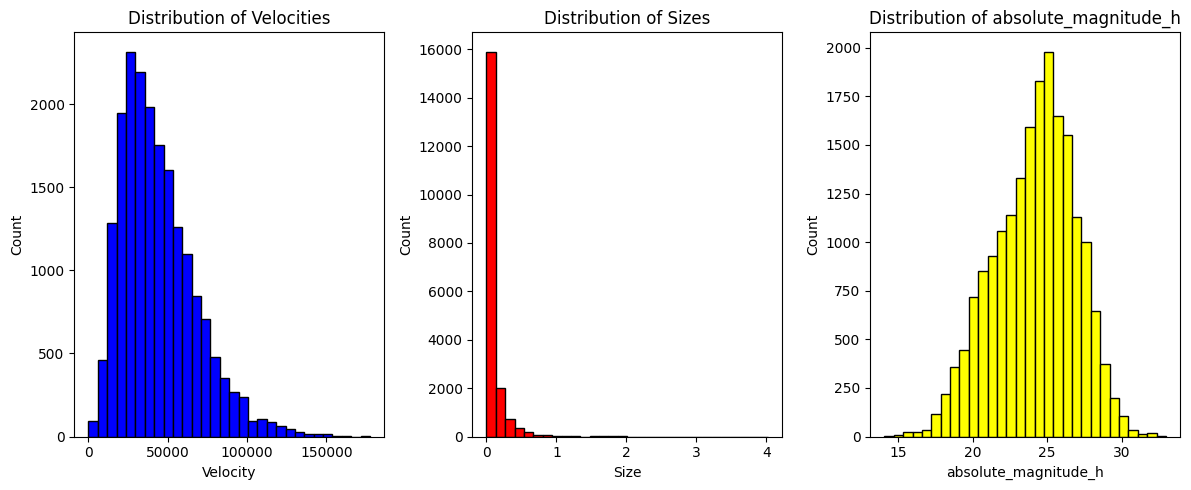

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12, 5))

# Plotting the histogram for velocities
ax[0].hist(df1['kilometers_per_hour'], bins=30, color='blue', edgecolor='black')
ax[0].set_title("Distribution of Velocities")
ax[0].set_xlabel("Velocity")
ax[0].set_ylabel("Count")

# Plotting the histogram for sizes
ax[1].hist(df1['estimated_diameter_min(km)'], bins=30, color='red', edgecolor='black')
ax[1].set_title("Distribution of Sizes")
ax[1].set_xlabel("Size")
ax[1].set_ylabel("Count")

# Plotting the histogram for absolute_magnitude_h
ax[2].hist(df1['absolute_magnitude_h'], bins=30, color='yellow', edgecolor='black')
ax[2].set_title("Distribution of absolute_magnitude_h")
ax[2].set_xlabel("absolute_magnitude_h")
ax[2].set_ylabel("Count")

plt.tight_layout()
plt.show()


In [ ]:
# Generate a correlation matrix
corr = df1.corr()
corr.style.background_gradient().set_precision(2)


<ipython-input-44-2cd62a7c1571>:3: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr.style.background_gradient().set_precision(2)


,absolute_magnitude_h,estimated_diameter_min(km),estimated_diameter_max(km),kilometers_per_hour,miss_distance(km),is_potentially_hazardous_asteroid,id
absolute_magnitude_h,1.00,-0.71,-0.71,-0.39,-0.38,-0.38,0.36
estimated_diameter_min(km),-0.71,1.00,1.00,0.33,0.27,0.31,-0.33
estimated_diameter_max(km),-0.71,1.00,1.00,0.33,0.27,0.31,-0.33
kilometers_per_hour,-0.39,0.33,0.33,1.00,0.30,0.22,-0.24
miss_distance(km),-0.38,0.27,0.27,0.30,1.00,0.10,-0.42
is_potentially_hazardous_asteroid,-0.38,0.31,0.31,0.22,0.10,1.00,-0.22
id,0.36,-0.33,-0.33,-0.24,-0.42,-0.22,1.00


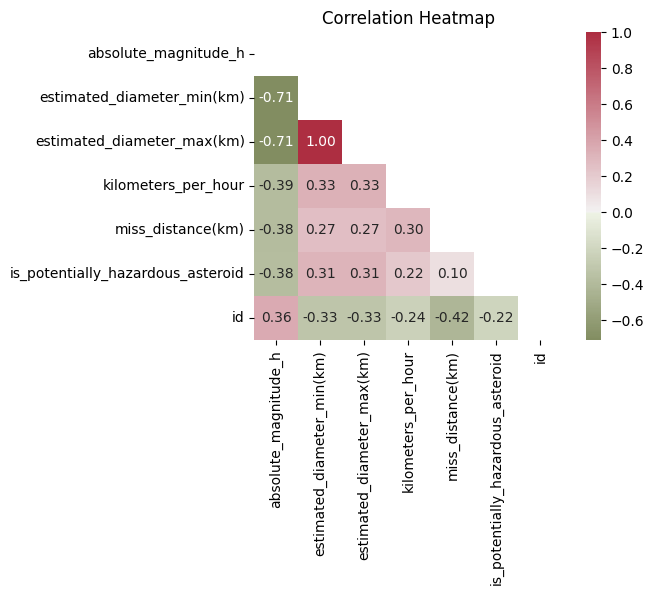

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = df1.corr()
#matrix = np.triu(corr)
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(100, 7, s=75, l=40,
                            n=5, center="light", as_cmap=True)

# Generate heatmap for corr matrix
plt.figure(figsize=(6, 4))
#sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
#sns.heatmap(corr, annot=True, )
#sns.heatmap(corr, annot=True, fmt=".2f", mask=matrix)
sns.heatmap(corr, mask=mask, center=0, annot=True,
            fmt='.2f', square=True, cmap=cmap)

#ax=sns.heatmap(corr, annot=corr.rank(axis="columns"))
#ax.set(xlabel="", ylabel="")
# ax.xaxis.tick_top()

plt.title('Correlation Heatmap')
plt.show()

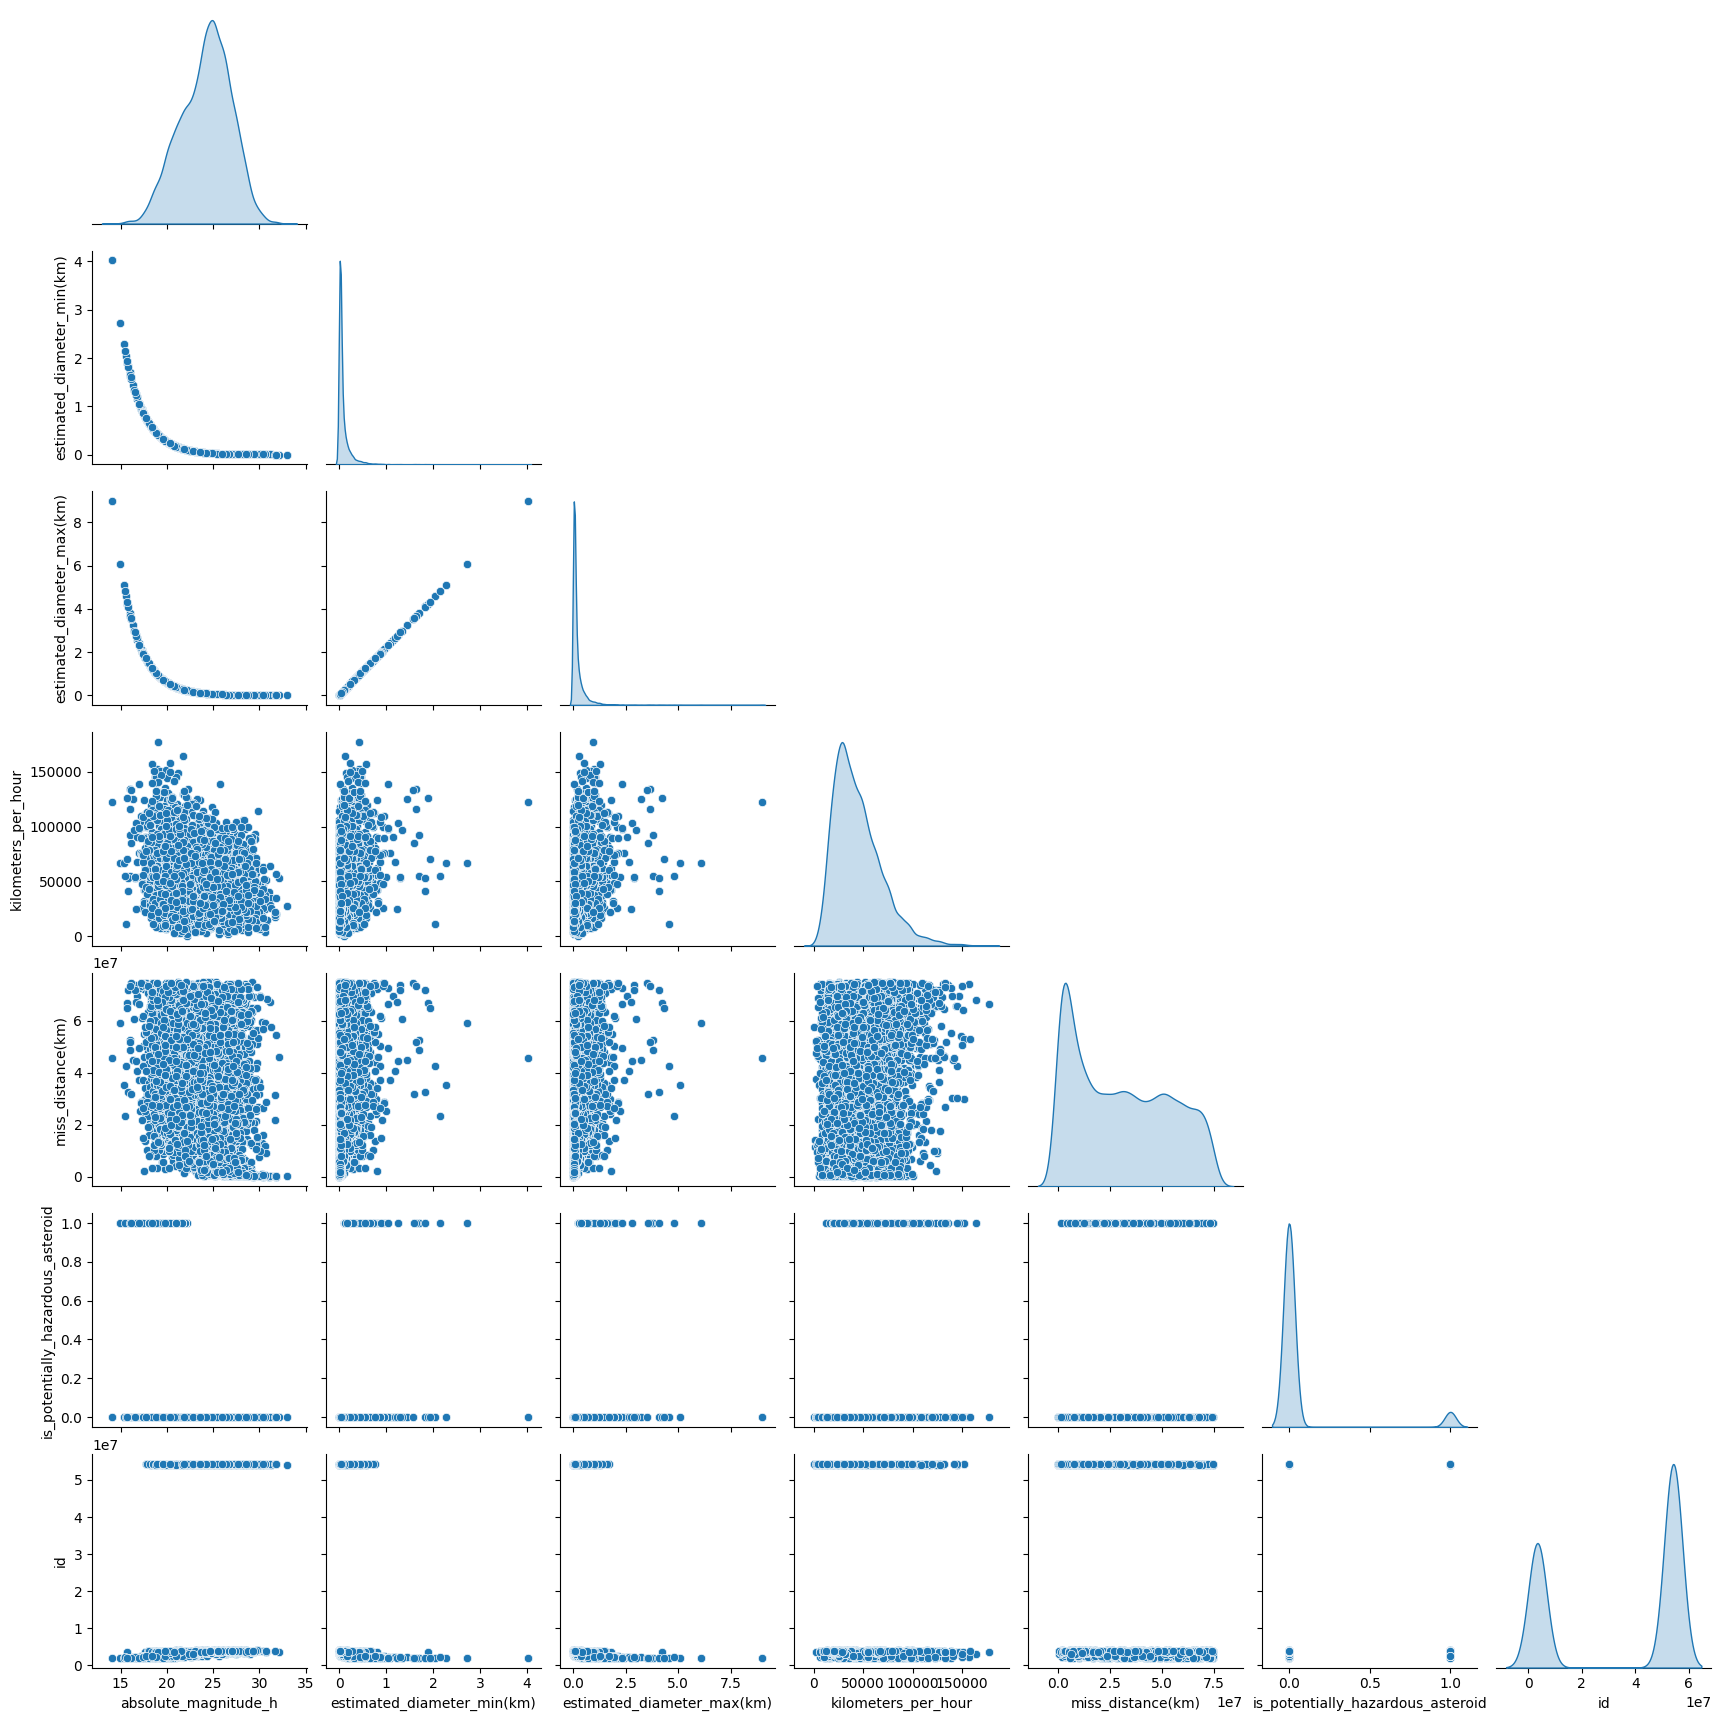

In [ ]:
#sns.pairplot(df1)
sns.pairplot(df1, corner=True, diag_kind="kde")


In [ ]:
dataset=df1.copy

Balancing the Dataset
lets feed our ML and equal amount of both samples

In [ ]:
# Separate hazardous from not_hazardous astroids
hazardous_asteroid = df1[df1['is_potentially_hazardous_asteroid'] == 1]
not_hazardous_asteroid = df1[df1['is_potentially_hazardous_asteroid'] == 0]

In [ ]:
print(hazardous_asteroid.shape)
print(not_hazardous_asteroid.shape)

(1332, 7)
(18042, 7)


In [ ]:
not_hazardous_asteroid = not_hazardous_asteroid.head(1332)

In [ ]:
print(hazardous_asteroid.shape)
print(not_hazardous_asteroid.shape)

(1332, 7)
(1332, 7)


In [ ]:
dataset = pd.concat([hazardous_asteroid, not_hazardous_asteroid], ignore_index=True)
dataset


,absolute_magnitude_h,estimated_diameter_min(km),estimated_diameter_max(km),kilometers_per_hour,miss_distance(km),is_potentially_hazardous_asteroid,id
0,20.70,0.192555,0.430566,47359.574639,3.781750e+07,1,3471590.0
1,21.78,0.117099,0.261842,26633.160979,1.162015e+07,1,54095182.0
2,19.90,0.278327,0.622358,71642.872872,4.907800e+07,1,54097969.0
3,21.01,0.166938,0.373285,56823.722123,6.992610e+06,1,3146499.0
4,19.69,0.306588,0.685551,39558.582946,3.676079e+06,1,2332446.0
...,...,...,...,...,...,...,...
2659,25.47,0.021407,0.047867,32927.097110,2.517505e+07,0,54316897.0
2660,27.30,0.009216,0.020608,24879.915926,6.700986e+07,0,3691849.0
2661,23.80,0.046191,0.103286,55973.478767,5.118115e+07,0,3802093.0
2662,23.60,0.050647,0.113250,46996.836709,3.665579e+07,0,54055058.0


In [ ]:
import os
from sklearn.model_selection import train_test_split
import numpy as np

In [ ]:
# Spliting dataset to Training, Test, and, Holding Datasets

In [ ]:
dataset.shape

(2664, 7)


# Analysis (model building and training):




---



In [ ]:
# Binary classifier

In [ ]:
# Actual Linear Model

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

# Randomize the dataset
dataset.sample(frac=1).reset_index(drop=True)

# Further Pre-Process
y_dataset = dataset['is_potentially_hazardous_asteroid']
X_dataset = dataset.drop(columns=['is_potentially_hazardous_asteroid'])

# First, let's split off the holdout data (20%)
X_temp, X_holdout, y_temp, y_holdout = train_test_split(X_dataset, y_dataset, test_size=0.2, random_state=42)

# Now, let's split the remaining data into training and test (80% * 0.25 = 20% of the total)
X_train, X_test, y_train, y_test = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)

# Preprocessing: Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_holdout_scaled = scaler.transform(X_holdout)  # Scale holdout data

# Create and train the model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on Test Set: {accuracy}")
print(classification_report(y_test, y_pred))

# Make some predictions on the holdout set
y_holdout_pred = model.predict(X_holdout_scaled)
accuracy_holdout = accuracy_score(y_holdout, y_holdout_pred)
print(f"Accuracy on Holdout Set: {accuracy_holdout}")
print(classification_report(y_holdout, y_holdout_pred))


Accuracy on Test Set: 0.8855534709193246
              precision    recall  f1-score   support

           0       0.93      0.82      0.87       256
           1       0.85      0.95      0.90       277

    accuracy                           0.89       533
   macro avg       0.89      0.88      0.88       533
weighted avg       0.89      0.89      0.88       533

Accuracy on Holdout Set: 0.9212007504690432
              precision    recall  f1-score   support

           0       0.97      0.87      0.92       264
           1       0.88      0.97      0.93       269

    accuracy                           0.92       533
   macro avg       0.93      0.92      0.92       533
weighted avg       0.93      0.92      0.92       533



In [ ]:
# Confusion Matrix for Test Set
from sklearn.metrics import confusion_matrix

conf_matrix_test = confusion_matrix(y_test, y_pred)
print("Confusion Matrix (Test Set):")
#print(conf_matrix_test)
df_cm = pd.DataFrame(conf_matrix_test, index=['Actual Negative', 'Actual Positive'], columns=['Predicted Negative', 'Predicted Positive'])
print(df_cm)

# Confusion Matrix for Holdout Set
conf_matrix_holdout = confusion_matrix(y_holdout, y_holdout_pred)
print("\nConfusion Matrix (Holdout Set):")
# print(conf_matrix_holdout)
df_cm = pd.DataFrame(conf_matrix_holdout, index=['Actual Negative', 'Actual Positive'], columns=['Predicted Negative', 'Predicted Positive'])
print(df_cm)


Confusion Matrix (Test Set):
                 Predicted Negative  Predicted Positive
Actual Negative                 210                  46
Actual Positive                  15                 262

Confusion Matrix (Holdout Set):
                 Predicted Negative  Predicted Positive
Actual Negative                 229                  35
Actual Positive                   7                 262


In [ ]:
# Actual Training for SVM

# from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

# Randomize the dataset
dataset.sample(frac=1).reset_index(drop=True)

# Assuming 'dataset' is defined and loaded somewhere above
y_dataset = dataset['is_potentially_hazardous_asteroid']
X_dataset = dataset.drop(columns=['is_potentially_hazardous_asteroid'])

X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, test_size=0.3, random_state=42)


# First, let's split off the holdout data (20%)
X_temp, X_holdout, y_temp, y_holdout = train_test_split(X_dataset, y_dataset, test_size=0.2, random_state=42)

# Now, let's split the remaining data into training and test (80% * 0.25 = 20% of the total)
X_train, X_test, y_train, y_test = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)

# Preprocessing: Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_holdout_scaled = scaler.transform(X_holdout)  # Scale holdout data

# Create and train the model
clf = SVC(kernel='poly')
# We will be comparing and changing
# the kernel to 'rbf',linear 'poly', etc. for our analysis.
clf.fit(X_train_scaled, y_train)

# Predict the labels for the scaled test data
from sklearn.metrics import accuracy_score
y_pred = clf.predict(X_test_scaled)


# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on Test Set: {accuracy:.2f}")
print(classification_report(y_test, y_pred))

# Make predictions on the holdout set
y_holdout_pred = model.predict(X_holdout_scaled)
accuracy_holdout = accuracy_score(y_holdout, y_holdout_pred)
print(f"Accuracy on Holdout Set: {accuracy_holdout:.2f}")
print(classification_report(y_holdout, y_holdout_pred))




Accuracy on Test Set: 0.89
              precision    recall  f1-score   support

           0       0.99      0.78      0.87       256
           1       0.83      0.99      0.90       277

    accuracy                           0.89       533
   macro avg       0.91      0.89      0.89       533
weighted avg       0.91      0.89      0.89       533

Accuracy on Holdout Set: 0.92
              precision    recall  f1-score   support

           0       0.97      0.87      0.92       264
           1       0.88      0.97      0.93       269

    accuracy                           0.92       533
   macro avg       0.93      0.92      0.92       533
weighted avg       0.93      0.92      0.92       533



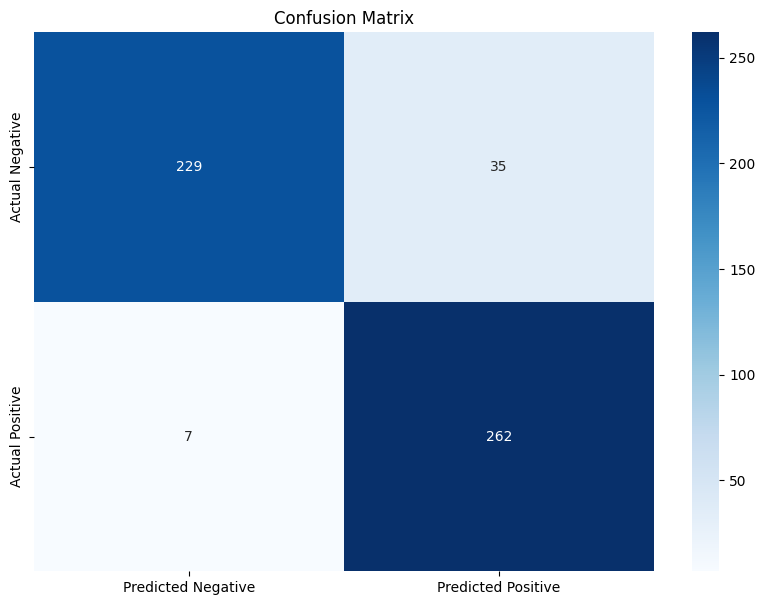

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion Matrix for Test Set
conf_matrix_test = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(conf_matrix_holdout, index=['Actual Negative', 'Actual Positive'], columns=['Predicted Negative', 'Predicted Positive'])

plt.figure(figsize=(10,7))
sns.heatmap(df_cm, annot=True, fmt='g', cmap='Blues')

# Set the title and show the plot
plt.title('Confusion Matrix')
plt.show()

In [ ]:


# 2. Predict using the model
y_pred_holdout = model.predict(X_holdout)

# print(y_pred_holdout[0],X_holdout[0])
y_pred_holdout

# 3. Evaluate the predictions
#from sklearn.metrics import accuracy_score, classification_report

#accuracy = accuracy_score(y_holdout, y_pred_holdout)
#print(f"Accuracy on Holdout Data: {accuracy * 100:.2f}%")

#print("Classification Report:")
#print(classification_report(y_holdout, y_pred_holdout))


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
# Ensure you are predicting using the scaled data
y_pred_holdout = model.predict(X_holdout_scaled)

print(y_pred_holdout)

[0 1 1 0 0 1 0 0 1 1 0 1 1 1 1 1 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 1 0 0 0
 1 1 1 0 1 1 1 1 0 1 1 1 1 0 0 1 1 1 1 0 1 0 0 0 0 1 0 1 1 1 1 1 1 0 0 1 1
 0 1 0 0 0 0 1 0 1 0 1 1 1 1 1 0 1 1 0 0 1 1 1 0 1 1 0 1 0 1 0 0 1 1 0 0 1
 1 1 1 0 0 1 1 1 1 1 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 1 1 1 1 1 1 0 1 1 0 0 1
 0 0 1 1 1 1 1 1 1 0 1 0 1 1 0 0 0 1 1 0 0 1 1 1 0 1 1 1 0 1 0 1 0 0 1 0 0
 0 0 1 0 1 1 1 1 1 0 1 0 0 1 0 1 0 0 0 0 1 1 0 0 1 0 0 1 1 0 1 0 1 0 1 0 0
 1 0 1 0 0 0 0 1 0 1 0 0 1 1 1 1 0 0 0 0 1 0 1 0 0 0 1 1 0 0 1 0 1 1 1 0 0
 1 1 0 0 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 0 1 1 1 0 0 1 1 1 0 1 1 1 0 1 1 0 1
 1 0 1 0 0 1 1 1 1 0 0 0 0 1 1 0 0 1 1 0 1 1 0 1 0 1 1 1 0 1 1 1 1 1 0 0 1
 0 0 1 1 0 1 1 1 0 1 1 1 0 0 0 0 1 1 0 0 0 1 0 0 1 1 1 1 1 0 0 1 0 0 1 0 1
 0 1 0 1 0 0 0 0 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 1 0 1 1 0 1 1 0 0 1 0
 0 1 1 0 1 1 1 0 1 1 0 1 0 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 0 1 0 0 1 0 0 1 1
 0 0 1 1 0 0 1 1 1 1 1 0 1 0 1 1 1 1 0 0 1 1 0 1 0 1 0 1 1 0 0 0 0 1 0 1 1
 1 1 0 1 1 1 0 0 0 0 1 1 

In [ ]:
#len(y_holdout.values) == len(y_pred_holdout)

check=[]
for i in range(len(y_holdout.values)):
  if y_holdout.values[i]==y_pred_holdout[i]:
    check.append(1)
  else:
    check.append(0)
print(sum(check),len(check))
# Accuracy is 91 % for holdout data.
print((sum(check))/len(check))




491 533
0.9212007504690432


# References:

[1]	Javier Roa, Davide Farnocchia, and Steven R. Chesley. 2021. A Novel Approach to Asteroid Impact Monitoring. In The Astronomical Journal, Volume 162, Number 6. The American Astronomical Society. DOI: https://doi.org/10.3847/1538-3881/ac193f

[2] NASA. 2014. Possible Asteroid Impacts with Earth: Name, orbit, and year range for impacts predicted by Sentry system. Available at Kaggle: https://www.kaggle.com/datasets/nasa/asteroid-impacts. Accessed [Oct 24].

[3] NASA. 2023. NASA APIs: Making NASA data accessible to application developers. Available at: https://api.nasa.gov/. Accessed [Oct 24 ].

[4] D. Perna, M.A. Barucci, L. Drube, A. Falke, M. Fulchignoni, A.W. Harris, A.W. Harris, Z. Kanuchova. 2015. A global response roadmap to the asteroid impact threat: The NEOShield perspective. In Planetary and Space Science, Volume 118, Pages 311-317. https://doi.org/10.1016/j.pss.2015.07.006

[5] WatchMojo.com. 2022. Top 10 Asteroid Impact Scenes in Movies. YouTube. https://www.youtube.com/watch?v=Ytl4kEA-3fw

[6] Brin K. Bailey, Alexander N. Cohen, Dharv Patel, Philip Lubin, Mark Boslough, Darrel Robertson, Sasha Egan, Jeeya Khetia, Teagan Costa, Elizabeth Silber, Irina Sagert, Oleg Korobkin, Glenn Sjoden. 2023. Asteroid 2023 NT1: A Cautionary Tale. arXiv preprint arXiv:2310.13112. https://arxiv.org/pdf/2310.13112v1.pdf.

[7] Center for Near Earth Object Studies (CNEOS). 2007. 29075 (1950 DA) Analyses, 2001-2007. Jet Propulsion Laboratory. https://cneos.jpl.nasa.gov/doc/1950da/.

[8] Center for Near Earth Object Studies (CNEOS). Year. Torino Impact Hazard Scale. Jet Propulsion Laboratory. https://cneos.jpl.nasa.gov/sentry/torino_scale.html.

[9] "The Top 10 Largest Meteorite Craters in the World." 2017. The Very Best Top 10. [Online]. Available: https://theverybesttop10.com/largest-meteorite-craters/. [Accessed: 11-02-2023].

[10] "List of impact craters on Earth." Wikipedia. [Online]. Available: https://en.wikipedia.org/wiki/List_of_impact_craters_on_Earth. [Accessed: 11-02-2023].

[11] "sklearn.svm.SVC." scikit-learn. [Online]. Available: https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html. [Accessed: 11-02-2023].